In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

All_filename = "All.csv"  
df_all = pd.read_csv(All_filename)
Active_filename = "Active.csv"  
df_active = pd.read_csv(Active_filename)
Lazy_filename = "Lazy.csv"  
df_lazy = pd.read_csv(Lazy_filename)

## All data

In [2]:
df_all.head()

File  Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  \
0  hrrv100wD.txt    775.321149    49.318846         19.884154   
1  hrrv150wD.txt    880.489736    55.127078         27.946404   
2  hrrv200wD.txt    807.773585    48.884345         21.198706   
3  hrrv250wD.txt    822.875691    75.407134         30.912709   
4  hrrv300wD.txt    839.483146    77.580638         33.797283   

   STD_RR_Exercise  Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  \
0        66.812876        622.598753        24.365101  13.289446  31.804604   
1        72.475058        657.493421        32.529406  17.763959  42.470314   
2        65.724143        569.836502        25.347094   9.567952  34.567316   
3       102.174187        540.288288        20.707133  10.106250  27.493486   
4       104.383436        477.420382         9.563650   4.873274  12.625029   

   SD1_Exercise  SD2_Exercise  SD1_Recovery  SD2_Recovery  
0    710.599526     54.438393     22.931997     73.520264  
1    791.543767     81.303204     38.228770    108.391939  
2    719.429257     74.891963     27.821784    102.272764  
3    758.587342     86.463744     30.523541    118.122605  
4    715.665072     70.410979     25.193996     96.456765

In [3]:
df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_all_dropped.head()

Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  STD_RR_Exercise  \
0    775.321149    49.318846         19.884154        66.812876   
1    880.489736    55.127078         27.946404        72.475058   
2    807.773585    48.884345         21.198706        65.724143   
3    822.875691    75.407134         30.912709       102.174187   
4    839.483146    77.580638         33.797283       104.383436   

   Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  SD1_Exercise  \
0        622.598753        24.365101  13.289446  31.804604    710.599526   
1        657.493421        32.529406  17.763959  42.470314    791.543767   
2        569.836502        25.347094   9.567952  34.567316    719.429257   
3        540.288288        20.707133  10.106250  27.493486    758.587342   
4        477.420382         9.563650   4.873274  12.625029    715.665072   

   SD2_Exercise  SD1_Recovery  SD2_Recovery  
0     54.438393     22.931997     73.520264  
1     81.303204     38.228770    108.391939  
2     74.891963     27.821784    102.272764  
3     86.463744     30.523541    118.122605  
4     70.410979     25.193996     96.456765

In [20]:
"""
columns = df_all_dropped.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  
        x = df_all_dropped.iloc[:, i] 
        y = df_all_dropped.iloc[:, j]  

        x_label = columns[i]  
        y_label = columns[j]  

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, marker='o', linestyle='-', color='blue')  

        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs {x_label}')

        plt.show()
"""

"\ncolumns = df_all_dropped.columns\n\nfor i in range(len(columns)):\n    for j in range(i + 1, len(columns)):  \n        x = df_all_dropped.iloc[:, i] \n        y = df_all_dropped.iloc[:, j]  \n\n        x_label = columns[i]  \n        y_label = columns[j]  \n\n        plt.figure(figsize=(8, 6))\n        plt.plot(x, y, marker='o', linestyle='-', color='blue')  \n\n        plt.xlabel(x_label)\n        plt.ylabel(y_label)\n        plt.title(f'{y_label} vs {x_label}')\n\n        plt.show()\n"

In [19]:
def PLOTS(df):
    columns = df.columns
    num_columns = len(columns)
    num_plots = num_columns * (num_columns - 1) // 2
    cols = 3
    rows = math.ceil(num_plots / cols)  
    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5)) 
    axes = axes.flatten()  
    plot_index = 0
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):  
            x = df_all_dropped.iloc[:, i]  
            y = df_all_dropped.iloc[:, j]  
            x_label = columns[i]  
            y_label = columns[j]  
            axes[plot_index].plot(x, y, marker='o', linestyle='-', color='blue')
            axes[plot_index].set_xlabel(x_label)
            axes[plot_index].set_ylabel(y_label)
            axes[plot_index].set_title(f'{y_label} vs {x_label}')
            plot_index += 1
    for idx in range(plot_index, len(axes)):
        fig.delaxes(axes[idx])  
    plt.tight_layout()
    plt.show()

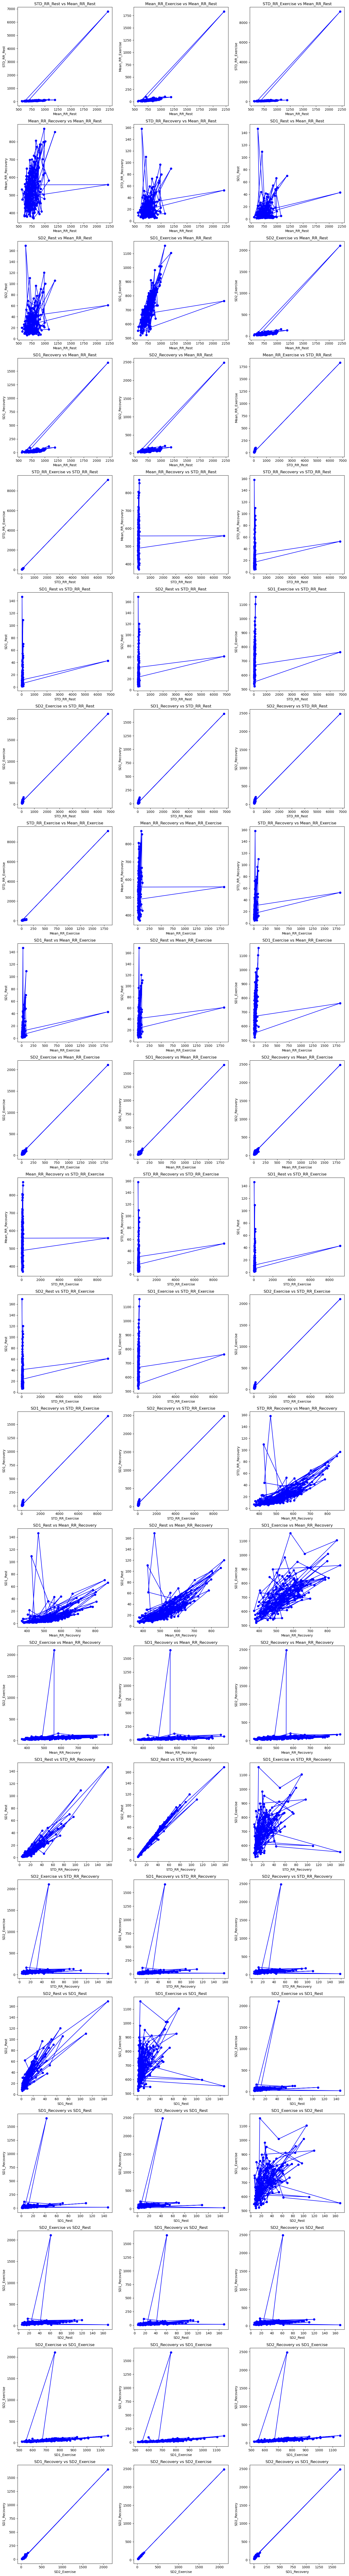

In [21]:
PLOTS(df_all_dropped)

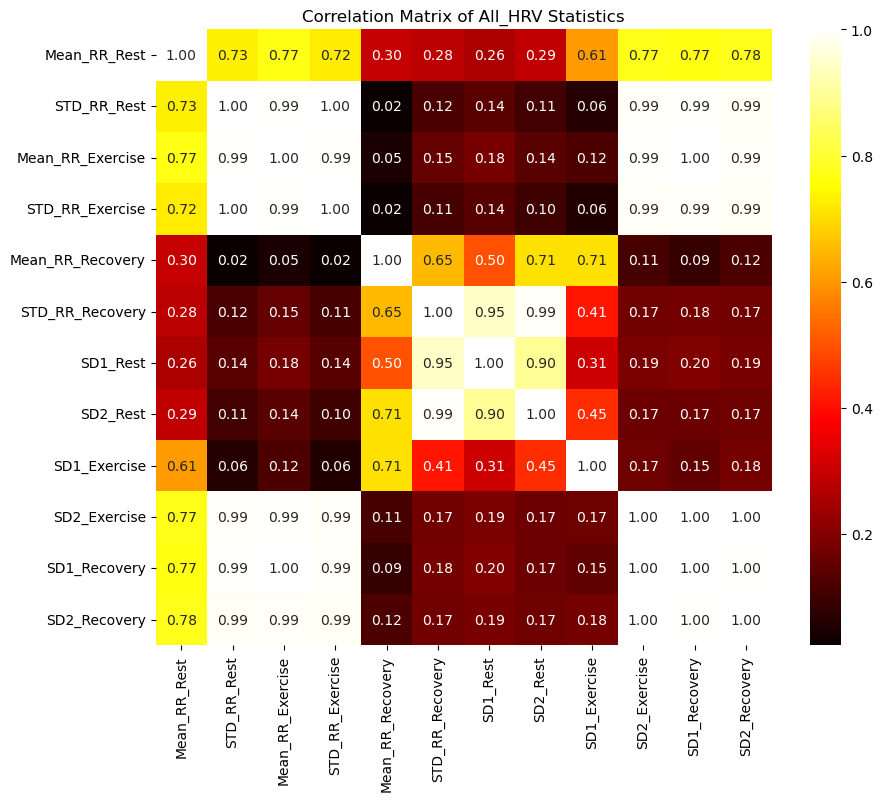

In [7]:
#sns.set(style='whitegrid')  
#pairplot = sns.pairplot(df_all_dropped, diag_kind='kde')  
#plt.title('Pairplot of All_HRV Statistics')
#plt.show()


correlation_matrix = df_all_dropped.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='hot', square=True, cbar=True)
plt.title('Correlation Matrix of All_HRV Statistics')
plt.show()

## Active data

In [10]:
df_active.head()

File  Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  \
0      VPS50W.txt    970.106796    93.833521         67.378896   
1     VPS100W.txt    811.615385    77.478406         36.154846   
2  VPS150Wtts.txt    861.768116    87.234341         46.305357   
3     VPS200W.txt    882.055882    70.479199         40.918276   
4     VPS250W.txt    803.573727    70.201724         28.918383   

   STD_RR_Exercise  Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  \
0       113.794735        798.254335        68.725382  46.736387  85.000683   
1       103.436815        621.000000        23.269507   8.218215  31.891050   
2       114.346792        577.589595        21.757358   4.904690  30.214064   
3        90.800665        550.338828        19.052093   4.586678  26.553690   
4        94.998882        423.642553        21.307273   2.139987  30.067643   

   SD1_Exercise  SD2_Exercise  SD1_Recovery  SD2_Recovery  
0    957.920128     86.876377     57.678222    108.686750  
1    782.152231     76.605393     29.903111    103.768439  
2    875.413994     77.813622     41.920159    101.487171  
3    983.215686    107.617693     64.846452    137.846818  
4    699.766900     61.394492     17.973696     84.985313

In [11]:
df_active_dropped = df_active.drop(df_active.columns[0], axis=1)
df_active_dropped.head()

Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  STD_RR_Exercise  \
0    970.106796    93.833521         67.378896       113.794735   
1    811.615385    77.478406         36.154846       103.436815   
2    861.768116    87.234341         46.305357       114.346792   
3    882.055882    70.479199         40.918276        90.800665   
4    803.573727    70.201724         28.918383        94.998882   

   Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  SD1_Exercise  \
0        798.254335        68.725382  46.736387  85.000683    957.920128   
1        621.000000        23.269507   8.218215  31.891050    782.152231   
2        577.589595        21.757358   4.904690  30.214064    875.413994   
3        550.338828        19.052093   4.586678  26.553690    983.215686   
4        423.642553        21.307273   2.139987  30.067643    699.766900   

   SD2_Exercise  SD1_Recovery  SD2_Recovery  
0     86.876377     57.678222    108.686750  
1     76.605393     29.903111    103.768439  
2     77.813622     41.920159    101.487171  
3    107.617693     64.846452    137.846818  
4     61.394492     17.973696     84.985313

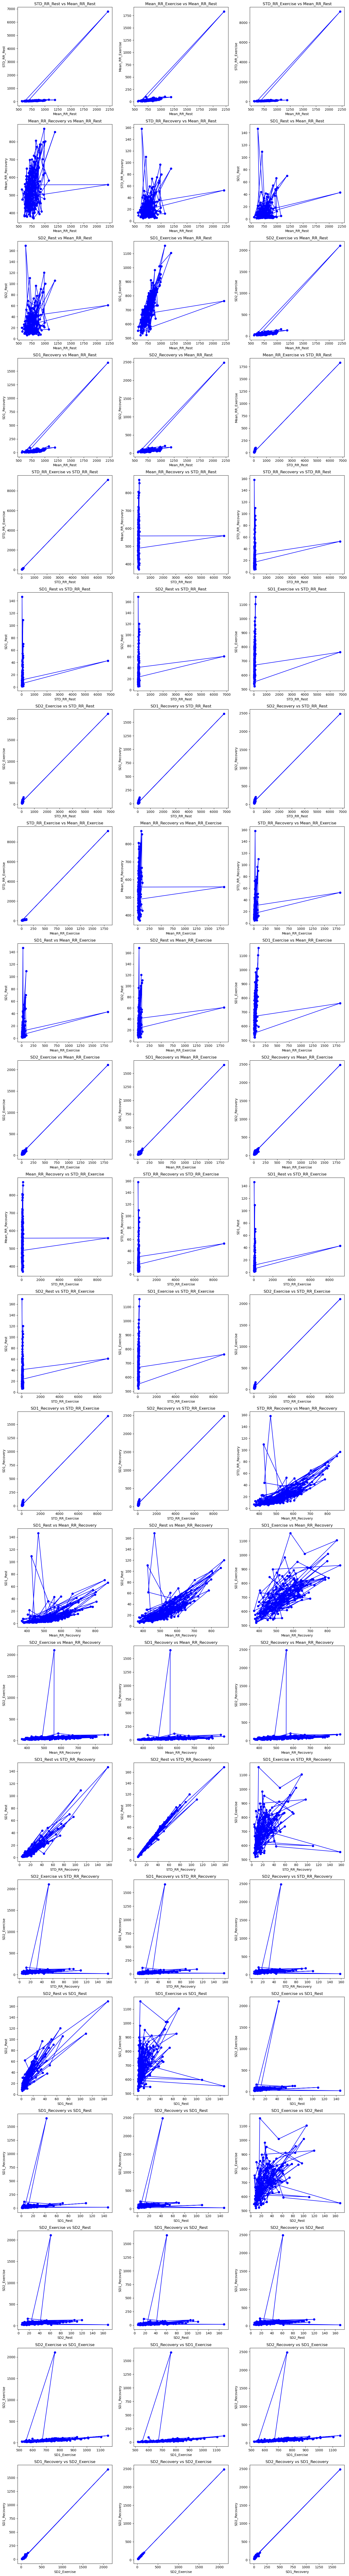

In [22]:
PLOTS(df_active_dropped)

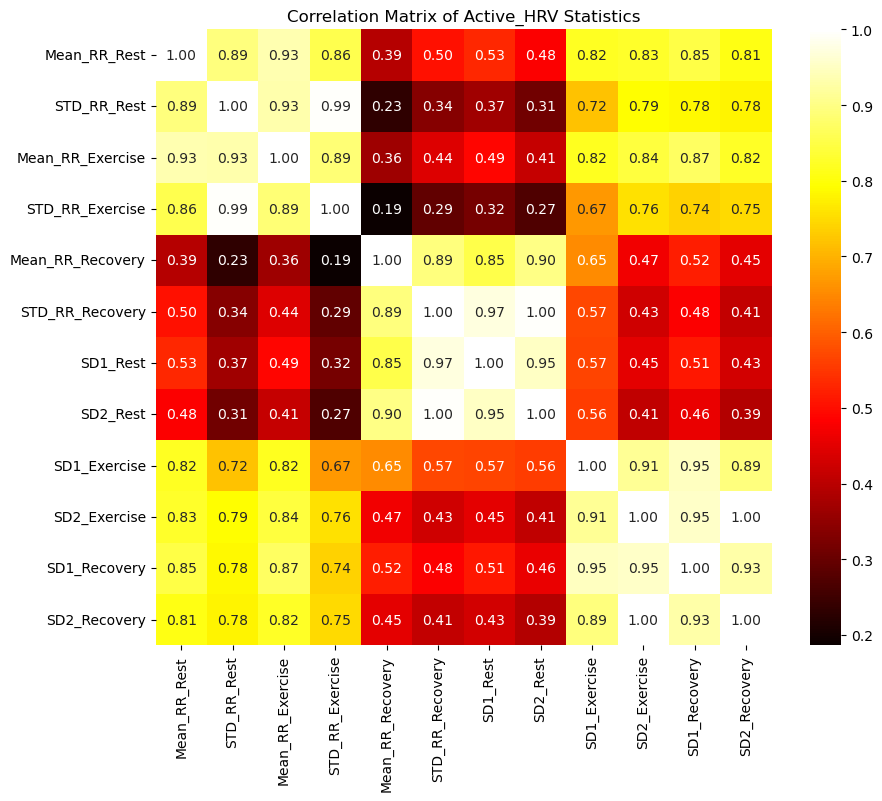

In [13]:
active_correlation_matrix = df_active_dropped.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(active_correlation_matrix, annot=True, fmt=".2f", cmap='hot', square=True, cbar=True)
plt.title('Correlation Matrix of Active_HRV Statistics')
plt.show()

## Lazy data

In [14]:
df_lazy.head()

File  Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  \
0  YARV50Wtts.txt    708.306604    60.228342         25.742175   
1    YARV100W.txt    648.653061    44.909784         15.063540   
2    YARV150W.txt    676.725000    38.940623         13.334150   
3    YARV200W.txt    607.449393    30.549099         10.815294   
4     CAMV50W.txt    643.359140    65.168186         25.835583   

   STD_RR_Exercise  Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  \
0        81.277542        636.040340        35.401915  19.918104  45.938042   
1        61.640560        543.876838        14.559131   7.604884  19.149406   
2        53.477826        467.123924        10.583906   2.897829  14.687864   
3        41.822764        387.621447         6.818436   1.357267   9.541790   
4        88.476684        588.374257        40.387976  21.187256  53.100795   

   SD1_Exercise  SD2_Exercise  SD1_Recovery  SD2_Recovery  
0    718.397129     65.380192     29.111174     87.734538  
1    690.960465     48.803506     22.797017     65.109631  
2    627.213508     28.871403     11.300433     39.279256  
3    555.467290     21.632840      6.649463     29.851814  
4    631.640000     59.831015     28.331670     79.685788

In [15]:
df_lazy_dropped = df_lazy.drop(df_lazy.columns[0], axis=1)
df_lazy_dropped.head()

Mean_RR_Rest  STD_RR_Rest  Mean_RR_Exercise  STD_RR_Exercise  \
0    708.306604    60.228342         25.742175        81.277542   
1    648.653061    44.909784         15.063540        61.640560   
2    676.725000    38.940623         13.334150        53.477826   
3    607.449393    30.549099         10.815294        41.822764   
4    643.359140    65.168186         25.835583        88.476684   

   Mean_RR_Recovery  STD_RR_Recovery   SD1_Rest   SD2_Rest  SD1_Exercise  \
0        636.040340        35.401915  19.918104  45.938042    718.397129   
1        543.876838        14.559131   7.604884  19.149406    690.960465   
2        467.123924        10.583906   2.897829  14.687864    627.213508   
3        387.621447         6.818436   1.357267   9.541790    555.467290   
4        588.374257        40.387976  21.187256  53.100795    631.640000   

   SD2_Exercise  SD1_Recovery  SD2_Recovery  
0     65.380192     29.111174     87.734538  
1     48.803506     22.797017     65.109631  
2     28.871403     11.300433     39.279256  
3     21.632840      6.649463     29.851814  
4     59.831015     28.331670     79.685788

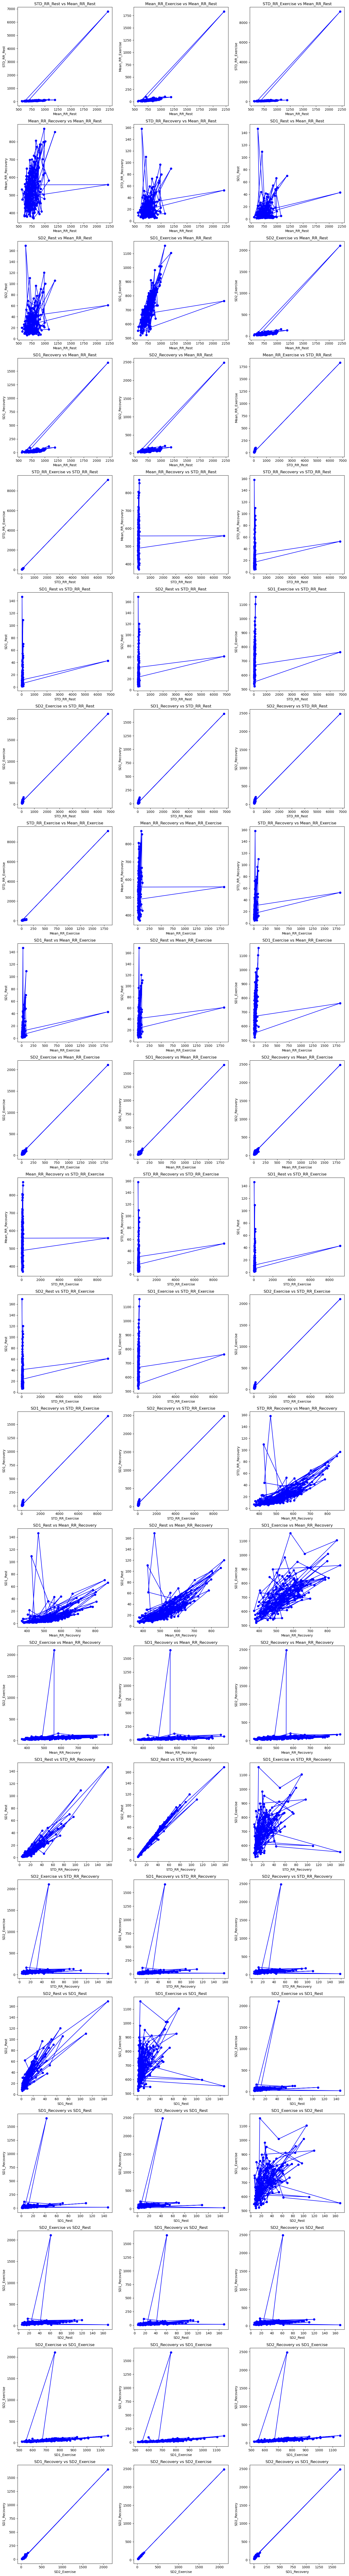

In [24]:
PLOTS(df_lazy_dropped)

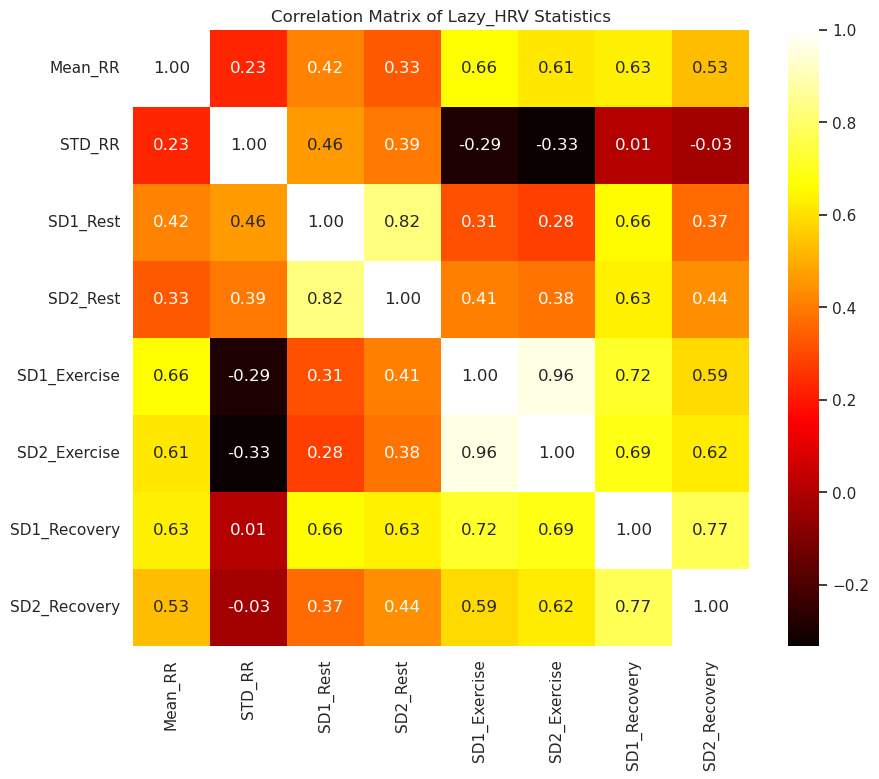

In [13]:
lazy_correlation_matrix = df_lazy_dropped.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(lazy_correlation_matrix, annot=True, fmt=".2f", cmap='hot', square=True, cbar=True)
plt.title('Correlation Matrix of Lazy_HRV Statistics')
plt.show()